In [1]:
pip install orion-ml

  Obtaining dependency information for orion-ml from https://files.pythonhosted.org/packages/18/48/9323edee10715c86c7c0634d78a21dc923ab0a7f65425f2a4f8635816239/orion_ml-0.6.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tensorflow<2.15,>=2.2 from https://files.pythonhosted.org/packages/7b/52/73752709bf4938f7cb82ed0cd0099bb195cfc41d0dfff694cf7f5b77ab97/tensorflow-2.14.1-cp311-cp311-macosx_10_15_x86_64.whl.metadata
  Obtaining dependency information for s3fs<0.5,>=0.2.2 from https://files.pythonhosted.org/packages/b8/e4/b8fc59248399d2482b39340ec9be4bb2493846ac23641b43115a7e5cd675/s3fs-0.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for mlblocks<0.7,>=0.6.1 from https://files.pythonhosted.org/packages/5b/50/2523eeb6552941fef61f087ec0896ae0364c9a0db062a8dcfc2c97af3499/mlblocks-0.6.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for ml-stars<0.3,>=0.2 from https://files.pythonhosted.org/packages/07/5e/dd578294f40535657faa79fd83a9

  Obtaining dependency information for tensorboard<2.15,>=2.14 from https://files.pythonhosted.org/packages/73/a2/66ed644f6ed1562e0285fcd959af17670ea313c8f331c46f79ee77187eb9/tensorboard-2.14.1-py3-none-any.whl.metadata
  Obtaining dependency information for tensorflow-estimator<2.15,>=2.14.0 from https://files.pythonhosted.org/packages/d1/da/4f264c196325bb6e37a6285caec5b12a03def489b57cc1fdac02bb6272cd/tensorflow_estimator-2.14.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for azure-core>=1.24.0 from https://files.pythonhosted.org/packages/d7/70/180df3b43ebc7a1ec957d9e5c2c76e6c54398ec61a67dff88d3e0131be80/azure_core-1.30.1-py3-none-any.whl.metadata
  Obtaining dependency information for isodate>=0.6.0 from https://files.pythonhosted.org/packages/b6/85/7882d311924cbcfc70b1890780763e36ff0b140c7e51c110fc59a532f087/isodate-0.6.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for google-auth-oauthlib<1.1,>=0.5 from https://files.pythonhosted.org/packag

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.1/131.1 kB 2.1 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 651.2 kB/s eta 0:00:0000:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 MB 2.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 2.2 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 2.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 2.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 2.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 MB 1.4 MB/s eta 0:00:0000:0100:04m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.6/145.6 kB 1.9 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.5 MB/s eta 0:00:00
Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.3 MB/s eta 0:00:00a

In [14]:
pip install ml-stars

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
from binance import Client
from dotenv import dotenv_values
from datetime import datetime

config = dotenv_values('.env')
client = Client(config.get('KEY'), config.get('SECRET_KEY'))
TICKER = 'BTCUSDT'
start_date = datetime(2017, 9, 1)
end_date = datetime(2024, 4, 1)

start_date_str = start_date.strftime('%d %b, %Y')
end_date_str = end_date.strftime('%d %b, %Y')

klines = client.get_historical_klines(TICKER, client.KLINE_INTERVAL_1DAY, start_date_str, end_date_str)
dataBTC = pd.DataFrame(
    data=[row[1:7] for row in klines],
    columns=['Open', 'High', 'Low', 'Close', 'Volume', 'Date'],
).set_index('Date')
dataBTC.index = pd.to_datetime(dataBTC.index, unit='ms')
dataBTC = dataBTC.sort_index()
dataBTC = dataBTC.apply(pd.to_numeric, axis=1)
dataBTC

,Open,High,Low,Close,Volume
Date,,,,,
2017-09-01 23:59:59.999,4689.89,4885.55,4654.88,4834.91,560.666366
2017-09-02 23:59:59.999,4796.16,4939.19,4286.87,4472.14,929.148595
2017-09-03 23:59:59.999,4508.50,4714.76,4298.33,4509.08,691.216198
2017-09-04 23:59:59.999,4505.00,4527.49,3972.51,4100.11,1394.644614
2017-09-05 23:59:59.999,4106.97,4484.99,3603.00,4366.47,1228.938157
...,...,...,...,...,...
2024-03-28 23:59:59.999,69469.99,71552.06,68903.62,70780.60,35439.032390
2024-03-29 23:59:59.999,70780.60,70916.16,69009.00,69850.54,25445.083530
2024-03-30 23:59:59.999,69850.53,70321.10,69540.00,69582.18,13644.611420


In [25]:
dataBTC=dataBTC.reset_index()
dataBTC

,Date_only,Open,High,Low,Close,Volume
0,2017-09-01,4689.89,4885.55,4654.88,4834.91,560.666366
1,2017-09-02,4796.16,4939.19,4286.87,4472.14,929.148595
2,2017-09-03,4508.50,4714.76,4298.33,4509.08,691.216198
3,2017-09-04,4505.00,4527.49,3972.51,4100.11,1394.644614
4,2017-09-05,4106.97,4484.99,3603.00,4366.47,1228.938157
...,...,...,...,...,...,...
2400,2024-03-28,69469.99,71552.06,68903.62,70780.60,35439.032390
2401,2024-03-29,70780.60,70916.16,69009.00,69850.54,25445.083530
2402,2024-03-30,69850.53,70321.10,69540.00,69582.18,13644.611420
2403,2024-03-31,69582.17,71366.00,69562.99,71280.01,19396.344330


In [3]:
#Train test split
train = dataBTC.iloc[:int(len(dataBTC)*0.7)]
train_data = train.drop(columns={'Date', 'Open', 'High', 'Low', 'Volume'})
train_data=train_data.rename(columns={'Close': 'value'})
train_data

,timestamp,value
0,1.504224e+12,4834.91
1,1.504310e+12,4472.14
2,1.504397e+12,4509.08
3,1.504483e+12,4100.11
4,1.504570e+12,4366.47
...,...,...
1678,1.649203e+12,43170.47
1679,1.649290e+12,43444.19
1680,1.649376e+12,42252.01
1681,1.649462e+12,42753.97


In [4]:
from orion import Orion
train_data

,timestamp,value
0,1.504224e+12,4834.91
1,1.504310e+12,4472.14
2,1.504397e+12,4509.08
3,1.504483e+12,4100.11
4,1.504570e+12,4366.47
...,...,...
1678,1.649203e+12,43170.47
1679,1.649290e+12,43444.19
1680,1.649376e+12,42252.01
1681,1.649462e+12,42753.97


In [5]:
from orion.analysis import analyze
hyperparameters = {
    'keras.Sequential.LSTMTimeSeriesRegressor#1': {
        'epochs': 5,
        'verbose': True
        
    }
}
pipeline = 'lstm_dynamic_threshold'
anomalies = analyze(pipeline, train_data, hyperparams=hyperparameters)
anomalies


2024-04-19 17:48:34.006754: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


KeyboardInterrupt: 

In [17]:
from orion.data import load_signal

In [28]:
train_data

,timestamp,value
0,1222819200,-0.366359
1,1222840800,-0.394108
2,1222862400,0.403625
3,1222884000,-0.362759
4,1222905600,-0.370746
...,...,...
2813,1283580000,-0.365308
2814,1283601600,1.000000
2815,1283623200,-0.341357
2816,1283644800,-0.392546


In [12]:
dataBTC['Date_only']=dataBTC.index.strftime('%Y-%m-%d')
dataBTC['Date_only']=pd.to_datetime(dataBTC['Date_only'])
dataBTC=dataBTC.set_index(dataBTC['Date_only'])
dataBTC

,Open,High,Low,Close,Volume,Date_only
Date_only,,,,,,
2017-09-01,4689.89,4885.55,4654.88,4834.91,560.666366,2017-09-01
2017-09-02,4796.16,4939.19,4286.87,4472.14,929.148595,2017-09-02
2017-09-03,4508.50,4714.76,4298.33,4509.08,691.216198,2017-09-03
2017-09-04,4505.00,4527.49,3972.51,4100.11,1394.644614,2017-09-04
2017-09-05,4106.97,4484.99,3603.00,4366.47,1228.938157,2017-09-05
...,...,...,...,...,...,...
2024-03-28,69469.99,71552.06,68903.62,70780.60,35439.032390,2024-03-28
2024-03-29,70780.60,70916.16,69009.00,69850.54,25445.083530,2024-03-29
2024-03-30,69850.53,70321.10,69540.00,69582.18,13644.611420,2024-03-30


In [13]:
dataBTC=dataBTC.drop(columns='Date_only')
dataBTC

,Open,High,Low,Close,Volume
Date_only,,,,,
2017-09-01,4689.89,4885.55,4654.88,4834.91,560.666366
2017-09-02,4796.16,4939.19,4286.87,4472.14,929.148595
2017-09-03,4508.50,4714.76,4298.33,4509.08,691.216198
2017-09-04,4505.00,4527.49,3972.51,4100.11,1394.644614
2017-09-05,4106.97,4484.99,3603.00,4366.47,1228.938157
...,...,...,...,...,...
2024-03-28,69469.99,71552.06,68903.62,70780.60,35439.032390
2024-03-29,70780.60,70916.16,69009.00,69850.54,25445.083530
2024-03-30,69850.53,70321.10,69540.00,69582.18,13644.611420


In [30]:
from sklearn.preprocessing import StandardScaler



In [43]:
from orion import Orion
from orion.primitives.tadgan import TadGAN

parameters = {
    "mlstars.custom.timeseries_preprocessing.time_segments_aggregate#1": {
            "interval": 3600 # hour level
    },'sklearn.preprocessing.MinMaxScaler#1': {
        'feature_range': (-1, 1)
    },
    
    'orion.primitives.tadgan.TadGAN#1': {
        'epochs': 5,
    }
}

orion = Orion(
    'tadgan',
    parameters
)

anomalies = orion.fit_detect(train_data)

/Users/athena/anaconda3/lib/python3.11/site-packages/sklearn/impute/_base.py:356: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(


Epoch: 1/5, Losses: {'cx_loss': -1.0073, 'cz_loss': -30.4356, 'eg_loss': 43.7877}
Epoch: 2/5, Losses: {'cx_loss': -0.8315, 'cz_loss': 0.0683, 'eg_loss': 4.7679}
Epoch: 3/5, Losses: {'cx_loss': -0.8058, 'cz_loss': 2.8823, 'eg_loss': -1.6866}
Epoch: 4/5, Losses: {'cx_loss': -0.7831, 'cz_loss': 3.6786, 'eg_loss': -1.7423}
Epoch: 5/5, Losses: {'cx_loss': -1.0498, 'cz_loss': 4.5926, 'eg_loss': -7.7526}
1259/1259 [==============================] - 11s 9ms/step


In [46]:
anomalies

,start,end,severity
0,1613084400,1614564000,0.652743
1,1617490800,1618491600,0.209329


In [47]:
train_data

,timestamp,value
0,1504224000,4834.91
1,1504310400,4472.14
2,1504396800,4509.08
3,1504483200,4100.11
4,1504569600,4366.47
...,...,...
1678,1649203200,43170.47
1679,1649289600,43444.19
1680,1649376000,42252.01
1681,1649462400,42753.97


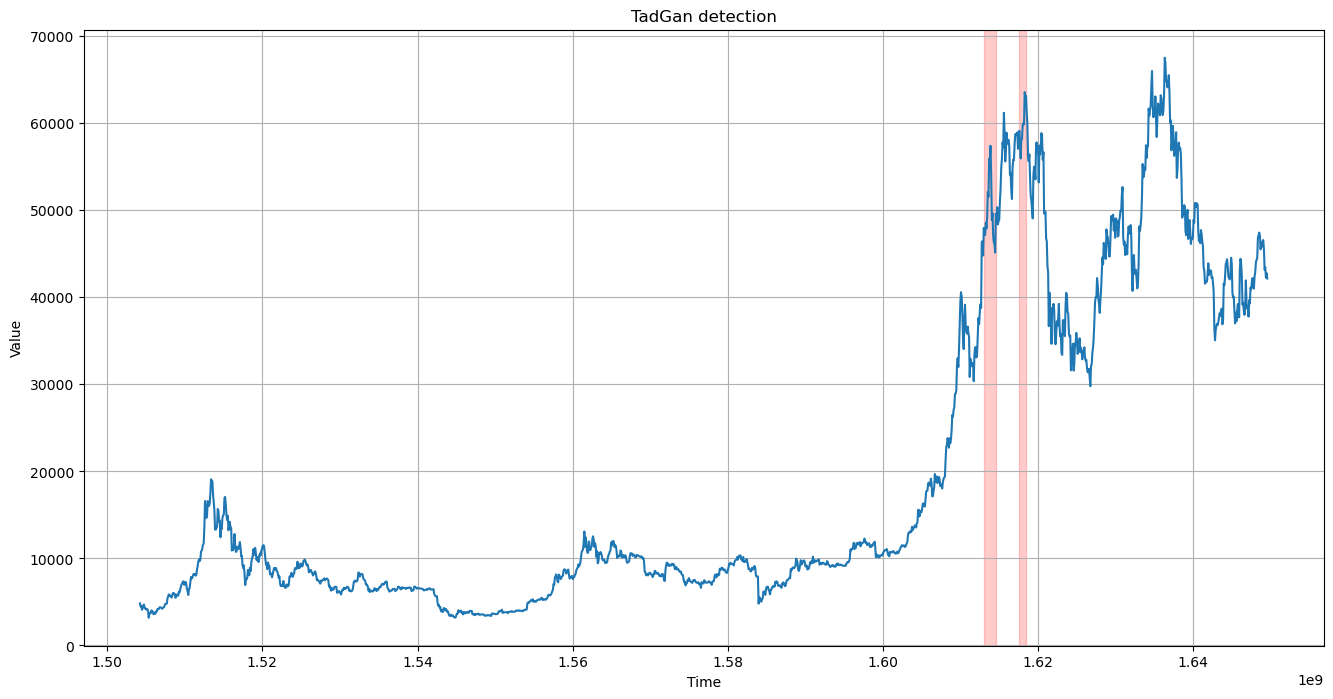

In [54]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(train_data['timestamp'], train_data['value'])
plt.axvspan(1613084400, 1614564000, alpha=0.2, color='red')
plt.axvspan(1617490800,1618491600, alpha=0.2, color='red' )

# Customize the plot
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("TadGan detection")
plt.grid(True)
plt.show()

In [28]:
dataBTC

,Date_only,Open,High,Low,Close,Volume
0,2017-09-01,4689.89,4885.55,4654.88,4834.91,560.666366
1,2017-09-02,4796.16,4939.19,4286.87,4472.14,929.148595
2,2017-09-03,4508.50,4714.76,4298.33,4509.08,691.216198
3,2017-09-04,4505.00,4527.49,3972.51,4100.11,1394.644614
4,2017-09-05,4106.97,4484.99,3603.00,4366.47,1228.938157
...,...,...,...,...,...,...
2400,2024-03-28,69469.99,71552.06,68903.62,70780.60,35439.032390
2401,2024-03-29,70780.60,70916.16,69009.00,69850.54,25445.083530
2402,2024-03-30,69850.53,70321.10,69540.00,69582.18,13644.611420
2403,2024-03-31,69582.17,71366.00,69562.99,71280.01,19396.344330


In [31]:
train

,Date,timestamp,Open,High,Low,Close,Volume
0,2017-09-01 23:59:59.999,1.504224e+12,4689.89,4885.55,4654.88,4834.91,560.666366
1,2017-09-02 23:59:59.999,1.504310e+12,4796.16,4939.19,4286.87,4472.14,929.148595
2,2017-09-03 23:59:59.999,1.504397e+12,4508.50,4714.76,4298.33,4509.08,691.216198
3,2017-09-04 23:59:59.999,1.504483e+12,4505.00,4527.49,3972.51,4100.11,1394.644614
4,2017-09-05 23:59:59.999,1.504570e+12,4106.97,4484.99,3603.00,4366.47,1228.938157
...,...,...,...,...,...,...,...
1678,2022-04-06 23:59:59.999,1.649203e+12,45497.54,45507.14,43121.00,43170.47,60849.329360
1679,2022-04-07 23:59:59.999,1.649290e+12,43170.47,43900.99,42727.35,43444.19,37396.541560
1680,2022-04-08 23:59:59.999,1.649376e+12,43444.20,43970.62,42107.14,42252.01,42375.042030
1681,2022-04-09 23:59:59.999,1.649462e+12,42252.02,42800.00,42125.48,42753.97,17891.660470


In [33]:
train_data

,timestamp,value
0,1.504224e+12,4834.91
1,1.504310e+12,4472.14
2,1.504397e+12,4509.08
3,1.504483e+12,4100.11
4,1.504570e+12,4366.47
...,...,...
1678,1.649203e+12,43170.47
1679,1.649290e+12,43444.19
1680,1.649376e+12,42252.01
1681,1.649462e+12,42753.97


In [35]:
timestamps = pd.to_datetime(train['timestamp'], unit='ms')
train_data['timestamp'] = timestamps.values.astype(np.int64) // 10 ** 9
train_data

,timestamp,value
0,1504224000,4834.91
1,1504310400,4472.14
2,1504396800,4509.08
3,1504483200,4100.11
4,1504569600,4366.47
...,...,...
1678,1649203200,43170.47
1679,1649289600,43444.19
1680,1649376000,42252.01
1681,1649462400,42753.97


In [60]:
df= (dataBTC.Close-dataBTC['Close'].mean())/dataBTC['Close'].std()

In [61]:
df

0      -1.027892
1      -1.049285
2      -1.047106
3      -1.071224
4      -1.055516
          ...   
2400    2.860970
2401    2.806123
2402    2.790298
2403    2.890420
2404    2.794285
Name: Close, Length: 2405, dtype: float64

In [63]:
dataBTC['Standardized_Close']=df
dataBTC=dataBTC.set_index(dataBTC['Date_only'])
dataBTC

,Date_only,Open,High,Low,Close,Volume,Standardized_Close
Date_only,,,,,,,
2017-09-01,2017-09-01,4689.89,4885.55,4654.88,4834.91,560.666366,-1.027892
2017-09-02,2017-09-02,4796.16,4939.19,4286.87,4472.14,929.148595,-1.049285
2017-09-03,2017-09-03,4508.50,4714.76,4298.33,4509.08,691.216198,-1.047106
2017-09-04,2017-09-04,4505.00,4527.49,3972.51,4100.11,1394.644614,-1.071224
2017-09-05,2017-09-05,4106.97,4484.99,3603.00,4366.47,1228.938157,-1.055516
...,...,...,...,...,...,...,...
2024-03-28,2024-03-28,69469.99,71552.06,68903.62,70780.60,35439.032390,2.860970
2024-03-29,2024-03-29,70780.60,70916.16,69009.00,69850.54,25445.083530,2.806123
2024-03-30,2024-03-30,69850.53,70321.10,69540.00,69582.18,13644.611420,2.790298


<Axes: title={'center': 'Standardized BTC price'}, xlabel='Date_only'>

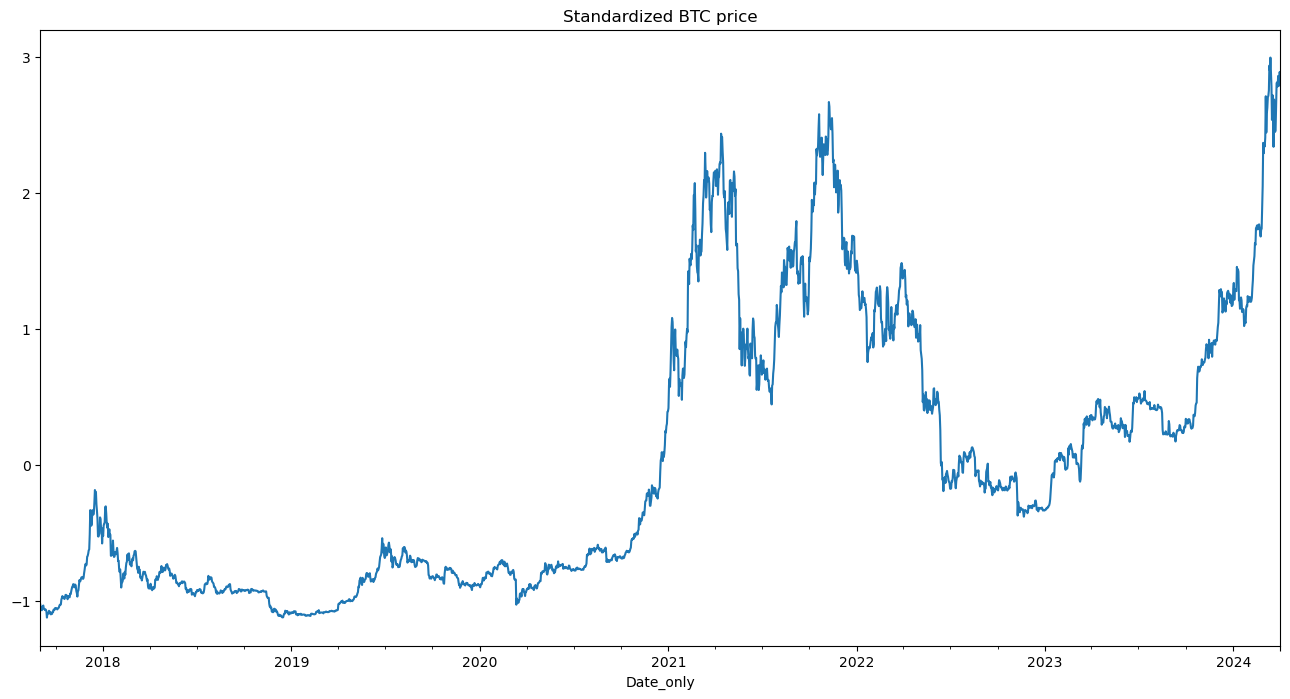

In [64]:
dataBTC['Standardized_Close'].plot(figsize=(16,8), title='Standardized BTC price')